# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'12fxzB88O1zKN-CjLPpWFsEuhN0QWEuS4'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Dataset.csv') 

In [0]:
import pandas as pd

df = pd.read_csv('Dataset.csv') 
df2=df

In [0]:
df.head()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,0,33,1,3.0,2,8,NaN,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,...,6,0,NaN,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,37,1,2.0,2,8,1.0,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,...,0,0,NaN,0,0,0,0,NaN,NaN,0,0,0,2.0,0,0,0,0.0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,37,1,2.0,2,8,NaN,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,...,6,0,NaN,0,0,0,0,NaN,NaN,0,0,0,2.0,0,0,0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,9,1,3.0,3,3,2.0,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,...,6,0,NaN,0,0,0,0,NaN,NaN,0,0,0,2.0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,40,1,4.0,2,10,1.0,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,...,0,0,NaN,0,0,0,0,NaN,NaN,0,0,0,6.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:

#Missing Values
total =df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
MGODRK,3228,55.4
PINBOED,1330,22.8
PMOTSCO,879,15.1
PBRAND,857,14.7
MGEMOMV,284,4.9


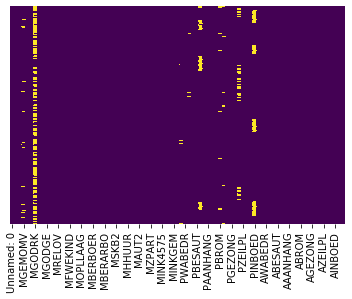

In [0]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
# We found Imbalanced Data in this dataset
df.groupby(['CARAVAN']).size().reset_index(name='counts')

,CARAVAN,counts
0,0,5474
1,1,348


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47979182e8>]],
      dtype=object)

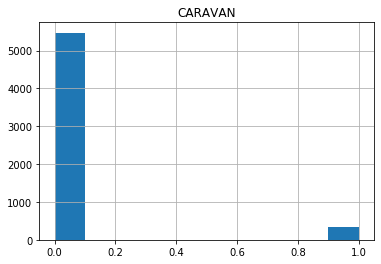

In [0]:
df.hist(column='CARAVAN')

In [0]:
#Correlation between features 
df.corr()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
Unnamed: 0,1.000000,-0.008546,0.001353,-0.004340,0.008444,-0.009326,-0.022368,-0.005757,-0.007103,0.017066,-0.015274,-0.008759,0.014856,0.018554,-0.000120,-0.018468,0.009316,-0.001583,0.000108,0.009840,-0.001693,0.007662,0.007848,-0.003150,-0.008291,0.003065,0.019764,-0.010240,0.001799,-0.001917,0.008943,-0.008936,-0.010387,-0.013540,0.016403,0.009554,-0.009714,0.015563,-0.008806,-0.009310,...,0.014690,0.018827,-0.010563,0.014246,-0.002358,0.014568,0.008783,0.019168,0.015034,0.015586,-0.002303,0.001895,-0.044409,-0.000472,-0.016667,0.007617,-0.028752,-0.010325,-0.024398,0.015617,0.004480,0.016523,0.017377,0.002574,0.017434,-0.000147,0.017710,0.005159,0.023038,0.003180,0.008591,-0.003136,0.002039,-0.020063,-0.011013,-0.015283,0.008488,-0.019674,-0.012922,0.006181
MOSTYPE,-0.008546,1.000000,-0.038721,-0.049600,0.009454,0.992672,-0.110083,0.090399,-0.025642,-0.019505,-0.065596,-0.016270,0.086939,0.029240,-0.066250,0.023408,-0.473606,-0.278429,0.525678,-0.418615,-0.117736,0.248598,-0.206198,0.304749,0.273051,-0.392931,-0.188518,-0.038078,0.386104,0.204630,0.148998,-0.149988,-0.177830,0.037795,0.155497,0.351784,-0.352164,0.201531,0.161055,-0.255483,...,-0.008459,-0.027940,-0.003506,0.018422,0.031749,0.096665,0.032408,0.025760,-0.042563,0.028420,-0.015115,0.001364,-0.009592,0.014379,-0.018116,-0.012124,-0.018901,-0.059084,-0.032937,-0.004066,0.079674,-0.008274,-0.027822,-0.012530,0.018883,0.030461,0.092055,0.020123,0.032137,-0.028829,0.021707,-0.012060,-0.002909,-0.011512,0.007801,-0.018162,-0.015774,-0.021087,-0.053718,-0.069385
MAANTHUI,0.001353,-0.038721,1.000000,0.018092,0.056975,-0.045817,0.051789,-0.024360,0.012056,0.020540,0.023025,-0.038566,-0.012544,0.032535,-0.082919,0.042143,0.003419,-0.053171,0.036529,-0.005747,0.042438,-0.018175,0.005762,0.024802,-0.052345,-0.014437,0.009924,-0.025303,-0.007345,0.020671,-0.049127,0.048361,-0.011175,0.023661,-0.011086,-0.016135,0.015282,0.014721,-0.024334,0.015371,...,-0.026229,-0.019982,-0.016813,-0.010525,-0.010934,-0.030618,-0.008149,-0.013833,0.020195,0.008396,0.011338,-0.017093,0.002289,-0.005387,0.004391,-0.016890,0.008185,-0.003767,0.042531,0.004693,-0.027627,-0.029427,-0.018716,-0.019295,-0.009690,-0.010349,-0.027570,-0.006756,-0.013336,0.020926,0.003321,0.009444,-0.016333,0.000655,-0.006189,0.000666,-0.020993,0.018304,-0.004166,-0.009809
MGEMOMV,-0.004340,-0.049600,0.018092,1.000000,-0.368973,-0.016289,-0.037335,0.035006,-0.103539,0.001001,0.439958,-0.160186,-0.399707,-0.549099,-0.432446,0.751252,0.029514,0.060992,-0.069617,0.013964,0.002315,0.092922,0.026844,0.007514,-0.146564,0.038913,0.065733,0.061714,-0.047194,-0.180490,-0.270067,0.268533,0.171885,0.158988,-0.320338,-0.067962,0.068134,-0.311937,0.012743,0.227784,...,0.004789,-0.010081,0.023046,-0.005141,0.006127,0.050336,0.029129,0.017209,0.010960,0.000404,0.008929,0.012042,0.052850,0.006712,-0.006489,0.023747,0.005477,0.044498,-0.032677,0.033154,0.032741,0.002803,-0.013893,0.011977,-0.003728,0.007792,0.051472,0.024906,0.011517,0.005134,-0.003282,0.009042,0.013940,0.004422,0.007712,-0.008426,0.022231,0.018697,0.036954,0.024307
MGEMLEEF,0.008444,0.009454,0.056975,-0.368973,1.000000,0.003872,-0.078861,0.093654,0.057737,-0.119966,-0.040384,-0.307401,0.199774,0.236594,0.204225,-0.355754,-0.025792,-0.221676,0.178965,0.141389,0.058309,0.090716,-0.162686,-0.048103,0.034338,0.047820,-0.155802,-0.040360,-0.063

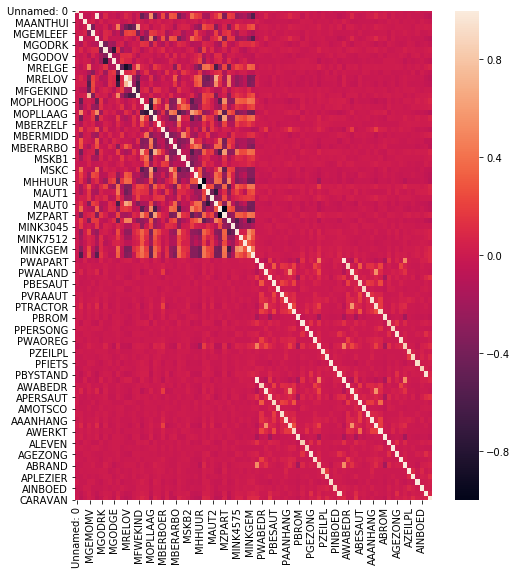

In [0]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 9))
sns.heatmap(df.corr())

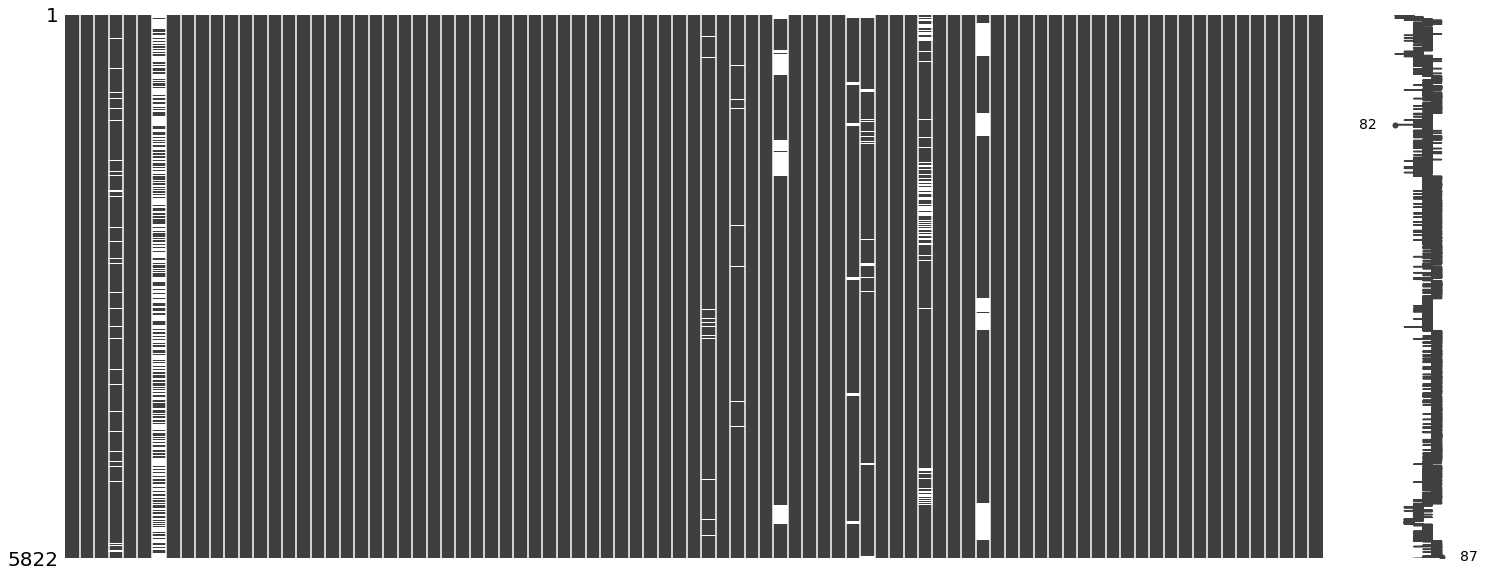

In [0]:
import missingno as msno
msno.matrix(df)

In [0]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = "NaN", 
                  strategy = "median", axis = 0)
imputer = imputer.fit(df.iloc[:,:-1])

df.iloc[:,:-1]= imputer.fit_transform(df.iloc[:,:-1])

print("\n\nNew Input with median Value for NaN : \n",df.head()) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)




New Input with median Value for NaN : 
    Unnamed: 0  MOSTYPE  MAANTHUI  MGEMOMV  ...  AFIETS  AINBOED  ABYSTAND  CARAVAN
0         0.0     33.0       1.0      3.0  ...     0.0      0.0       0.0        0
1         1.0     37.0       1.0      2.0  ...     0.0      0.0       0.0        0
2         2.0     37.0       1.0      2.0  ...     0.0      0.0       0.0        0
3         3.0      9.0       1.0      3.0  ...     0.0      0.0       0.0        0
4         4.0     40.0       1.0      4.0  ...     0.0      0.0       0.0        0

[5 rows x 87 columns]


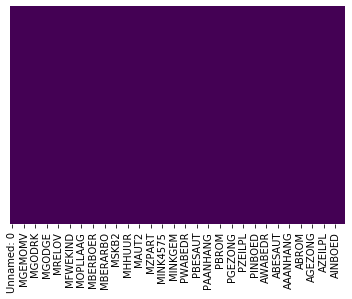

In [0]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No handles with labels found to put in legend.


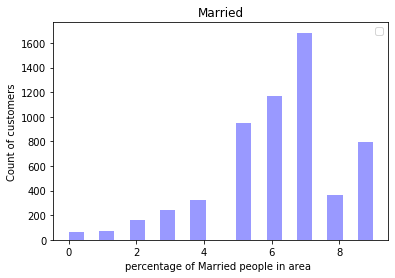

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['MRELGE'],bins=20,hist=True,kde=False,color='blue')
# Add labels
plt.title('Married')
plt.xlabel('percentage of Married people in area  ')
plt.ylabel('Count of customers')
plt.legend()

No handles with labels found to put in legend.


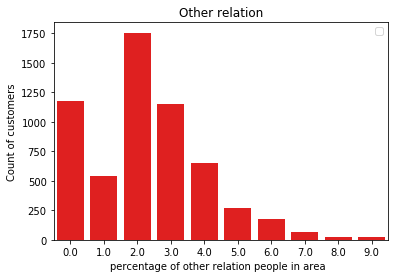

In [0]:
sns.countplot(df['MRELOV'],color='red')
# Add labels
plt.title('Other relation')
plt.xlabel('percentage of other relation people in area  ')
plt.ylabel('Count of customers')
plt.legend()

No handles with labels found to put in legend.


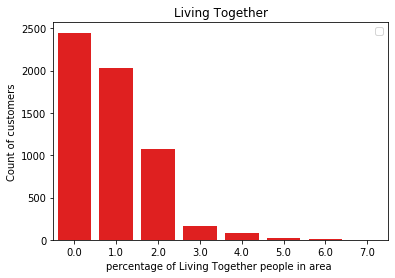

In [0]:
sns.countplot(df['MRELSA'],color='red')
# Add labels
plt.title('Living Together')
plt.xlabel('percentage of Living Together people in area ')
plt.ylabel('Count of customers')
plt.legend()

No handles with labels found to put in legend.


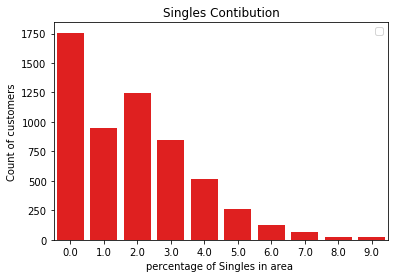

In [0]:
sns.countplot(df['MFALLEEN'],color='red')
# Add labels
plt.title('Singles Contibution')
plt.xlabel('percentage of Singles in area ')
plt.ylabel('Count of customers')
plt.legend()

No handles with labels found to put in legend.


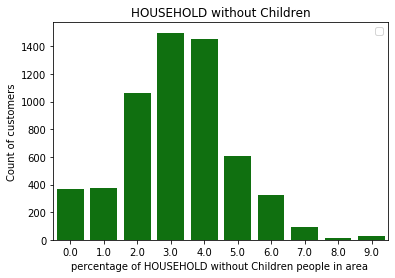

In [0]:
sns.countplot(df['MFGEKIND'],color='green')
# Add labels
plt.title('HOUSEHOLD without Children')
plt.xlabel('percentage of HOUSEHOLD without Children people in area ')
plt.ylabel('Count of customers')
plt.legend()

No handles with labels found to put in legend.


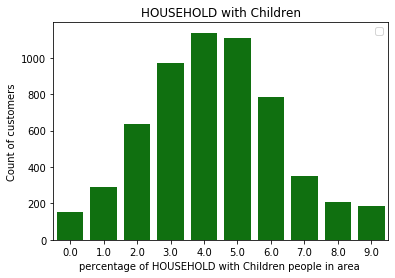

In [0]:
sns.countplot(df['MFWEKIND'],color='green')
# Add labels
plt.title('HOUSEHOLD with Children')
plt.xlabel('percentage of HOUSEHOLD with Children people in area ')
plt.ylabel('Count of customers')
plt.legend()

No handles with labels found to put in legend.


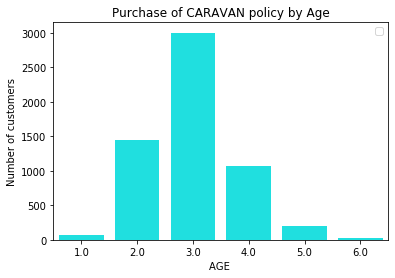

In [0]:
sns.countplot(df['MGEMLEEF'],color='cyan')
# Add labels
plt.title('Purchase of CARAVAN policy by Age')
plt.xlabel('AGE ')
plt.ylabel('Number of customers')
plt.legend()

No handles with labels found to put in legend.


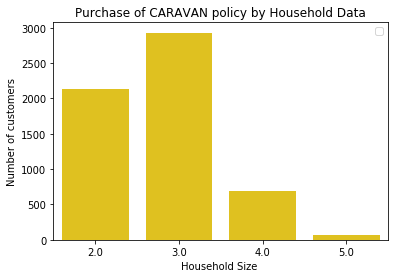

In [0]:
sns.countplot(df['MGEMOMV'],color='gold')
# Add labels
plt.title('Purchase of CARAVAN policy by Household Data')
plt.xlabel('Household Size ')
plt.ylabel('Number of customers')
plt.legend()

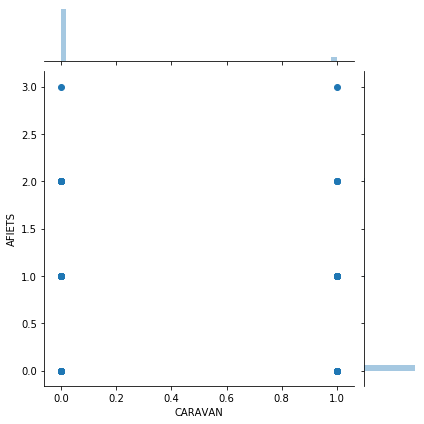

In [0]:
sns.jointplot(x="CARAVAN", y="AFIETS", data=df)

No handles with labels found to put in legend.


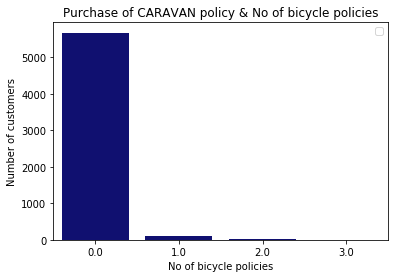

In [0]:
sns.countplot(df['AFIETS'],color='navy')
# Add labels
plt.title('Purchase of CARAVAN policy & No of bicycle policies')
plt.xlabel('No of bicycle policies')
plt.ylabel('Number of customers')
plt.legend()

No handles with labels found to put in legend.


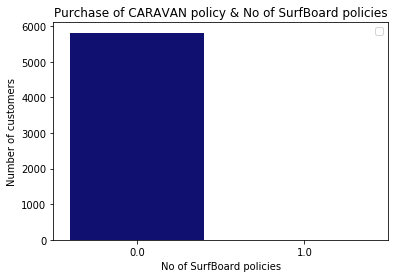

In [0]:
sns.countplot(df['AZEILPL'],color='navy')
# Add labels
plt.title('Purchase of CARAVAN policy & No of SurfBoard policies')
plt.xlabel('No of SurfBoard policies')
plt.ylabel('Number of customers')
plt.legend()

No handles with labels found to put in legend.


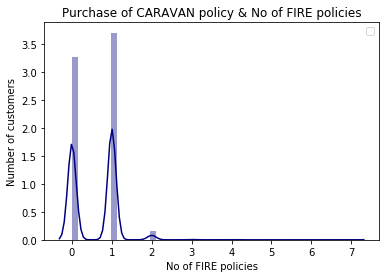

In [0]:
import seaborn as sns
sns.distplot(df['ABRAND'],color='navy')
# Add labels
plt.title('Purchase of CARAVAN policy & No of FIRE policies')
plt.xlabel('No of FIRE policies')
plt.ylabel('Number of customers')
plt.legend()

No handles with labels found to put in legend.


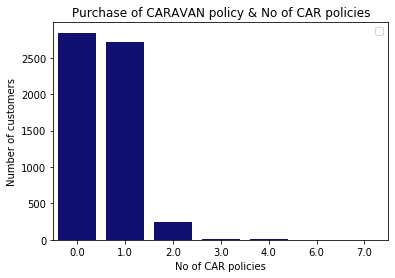

In [0]:
sns.countplot(df['APERSAUT'],color='navy')
# Add labels
plt.title('Purchase of CARAVAN policy & No of CAR policies')
plt.xlabel('No of CAR policies')
plt.ylabel('Number of customers')
plt.legend()

No handles with labels found to put in legend.


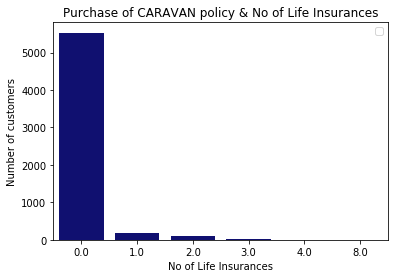

In [0]:
sns.countplot(df['ALEVEN'],color='navy')
# Add labels
plt.title('Purchase of CARAVAN policy & No of Life Insurances')
plt.xlabel('No of Life Insurances')
plt.ylabel('Number of customers')
plt.legend()

No handles with labels found to put in legend.


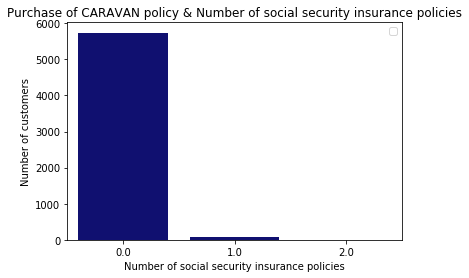

In [0]:
sns.countplot(df['ABYSTAND'],color='navy')
# Add labels
plt.title('Purchase of CARAVAN policy & Number of social security insurance policies')
plt.xlabel('Number of social security insurance policies')
plt.ylabel('Number of customers')
plt.legend()

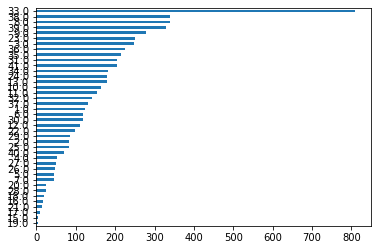

In [0]:
pd.value_counts(df["MOSTYPE"]).plot(kind='barh').invert_yaxis()

In [0]:
 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


#rough Model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
knnclassifier = KNeighborsClassifier(n_neighbors=3)
steps = [('imputation', imp),('KNeighbors_Classifier', knnclassifier)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                 test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


0.9250143102461362

In [0]:
import pandas_profiling as pf

In [0]:
pf.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,87
Number of observations,5822
Total Missing (%),0.0%
Total size in memory,3.9 MiB
Average record size in memory,696.0 B
Numeric,67
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,16


In [0]:
#Drop Columns which are highly Colinear with other Columns




In [0]:
df.isnull().sum()

Unnamed: 0    0
MOSTYPE       0
MAANTHUI      0
MGEMOMV       0
MGEMLEEF      0
             ..
APLEZIER      0
AFIETS        0
AINBOED       0
ABYSTAND      0
CARAVAN       0
Length: 87, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 87 columns):
Unnamed: 0    5822 non-null float64
MOSTYPE       5822 non-null float64
MAANTHUI      5822 non-null float64
MGEMOMV       5822 non-null float64
MGEMLEEF      5822 non-null float64
MOSHOOFD      5822 non-null float64
MGODRK        5822 non-null float64
MGODPR        5822 non-null float64
MGODOV        5822 non-null float64
MGODGE        5822 non-null float64
MRELGE        5822 non-null float64
MRELSA        5822 non-null float64
MRELOV        5822 non-null float64
MFALLEEN      5822 non-null float64
MFGEKIND      5822 non-null float64
MFWEKIND      5822 non-null float64
MOPLHOOG      5822 non-null float64
MOPLMIDD      5822 non-null float64
MOPLLAAG      5822 non-null float64
MBERHOOG      5822 non-null float64
MBERZELF      5822 non-null float64
MBERBOER      5822 non-null float64
MBERMIDD      5822 non-null float64
MBERARBG      5822 non-null float64
MBERARBO      5822 non-null f

In [0]:
df.shape

(5822, 87)

In [0]:
y=df['CARAVAN']
x=df.drop('CARAVAN',axis=1)

In [0]:
x.shape

(5822, 86)

In [0]:
y.shape

(5822,)

In [0]:
def vif_cal(input_data,dependent_col):
  import statsmodels.formula.api as sm
  x_vars = input_data.drop([dependent_col],axis = 1)
  xvar_names = x_vars.columns
  for i in range(0,xvar_names.shape[0]):
    y=x_vars[xvar_names[i]]
    x=x_vars[xvar_names.drop(xvar_names[i])]
    rsq = sm.ols(formula="y~x",data=x_vars).fit().rsquared
    vif = round(1/(1-rsq),2)
    method=list()
    if vif<=5:
       print(xvar_names[i],"VIF = ", vif)
       #print(xvar_names[i])
    else:
    #  method.extend(xvar_names[i])
      print(xvar_names[i])
        

In [0]:
vif_cal(input_data=df,dependent_col="CARAVAN")


Unnamed: 0 VIF =  1.01
MOSTYPE
MAANTHUI VIF =  1.07
MGEMOMV VIF =  2.06
MGEMLEEF VIF =  1.8
MOSHOOFD
MGODRK VIF =  3.64
MGODPR
MGODOV VIF =  3.99
MGODGE
MRELGE
MRELSA
MRELOV
MFALLEEN
MFGEKIND
MFWEKIND
MOPLHOOG
MOPLMIDD
MOPLLAAG
MBERHOOG
MBERZELF VIF =  1.8
MBERBOER VIF =  3.12
MBERMIDD
MBERARBG
MBERARBO
MSKA
MSKB1 VIF =  4.9
MSKB2
MSKC
MSKD VIF =  4.14
MHHUUR
MHKOOP
MAUT1
MAUT2
MAUT0
MZFONDS
MZPART
MINKM30
MINK3045
MINK4575
MINK7512 VIF =  4.11
MINK123M VIF =  1.59
MINKGEM VIF =  3.98
MKOOPKLA VIF =  2.27
PWAPART
PWABEDR
PWALAND
PPERSAUT
PBESAUT
PMOTSCO
PVRAAUT
PAANHANG
PTRACTOR
PWERKT
PBROM
PLEVEN VIF =  3.43
PPERSONG
PGEZONG
PWAOREG
PBRAND VIF =  2.96
PZEILPL VIF =  4.31
PPLEZIER
PFIETS
PINBOED VIF =  4.35
PBYSTAND
AWAPART
AWABEDR
AWALAND
APERSAUT
ABESAUT
AMOTSCO
AVRAAUT
AAANHANG
ATRACTOR
AWERKT
ABROM
ALEVEN VIF =  3.43
APERSONG
AGEZONG
AWAOREG
ABRAND VIF =  3.04
AZEILPL VIF =  4.5
APLEZIER
AFIETS
AINBOED VIF =  4.4
ABYSTAND


In [0]:
df = df.drop(["MOSTYPE","MOSHOOFD","MRELGE","MRELOV","MFALLEEN","MFWEKIND","MOPLMIDD","MOPLLAAG","MHHUUR","MHKOOP","MAUT1","MZFONDS","MZPART",
              "PWALAND","PAANHANG","PBROM","PGEZONG","PBYSTAND","AWALAND","AAANHANG","ABROM","AGEZONG","ABYSTAND"],axis=1)

In [0]:
df

,Unnamed: 0,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MGODGE,MRELSA,MFGEKIND,MOPLHOOG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MAUT2,MAUT0,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PTRACTOR,PWERKT,PLEVEN,PPERSONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,AWAPART,AWABEDR,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,ATRACTOR,AWERKT,ALEVEN,APERSONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,CARAVAN
0,0.0,1.0,3.0,2.0,1.0,5.0,1.0,3.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,5.0,2.0,1.0,1.0,2.0,6.0,1.0,0.0,1.0,0.0,4.0,5.0,0.0,0.0,4.0,3.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,1.0,1.0,2.0,2.0,1.0,4.0,1.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,2.0,3.0,5.0,0.0,1.0,2.0,2.0,0.0,5.0,2.0,0.0,5.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,2.0,1.0,2.0,2.0,1.0,4.0,2.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0,5.0,0.0,4.0,0.0,0.0,2.0,4.0,5.0,0.0,0.0,0.0,3.0,4.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,3.0,1.0,3.0,3.0,2.0,3.0,2.0,4.0,2.0,3.0,3.0,4.0,0.0,0.0,3.0,1.0,2.0,3.0,2.0,1.0,4.0,0.0,0.0,0.0,1.0,5.0,3.0,0.0,0.0,4.0,4.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,4.0,1.0,4.0,2.0,1.0,4.0,1.0,4.0,1.0,4.0,5.0,0.0,5.0,4.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,9.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,5817.0,1.0,3.0,2.0,1.0,6.0,1.0,2.0,2.0,3.0,2.0,2.0,0.0,0.0,4.0,1.0,3.0,2.0,3.0,3.0,3.0,0.0,1.0,3.0,4.0,3.0,3.0,0.0,0.0,3.0,3.0,2.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
5818,5818.0,1.0,4.0,4.0,1.0,4.0,1.0,4.0,0.0,2.0,0.0,2.0,1.0,1.0,3.0,3.0,2.0,0.0,4.0,5.0,0.0,0.0,1.0,2.0,0.0,9.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
5819,5819.0,1.0,3.0,4.0,1.0,6.0,0.0,3.0,1.0,3.0,0.0,1.0,0.0,0.0,2.0,3.0,5.0,1.0,1.0,1.0,4.0,4.0,0.0,5.0,5.0,3.0,1.0,1.0,0.0,3.0,3.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
5820,5820.0,1.0,3.0,2.0,1.0,7.0,0.0,2.0,2.0,4.0,0.0,0.0,2.0,0.0,2.0,4.0,2.0,0.0,0.0,4.0,5.0,0.0,4.0,0.0,0.0,5.0,4.0,0.0,0.0,4.0,6.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


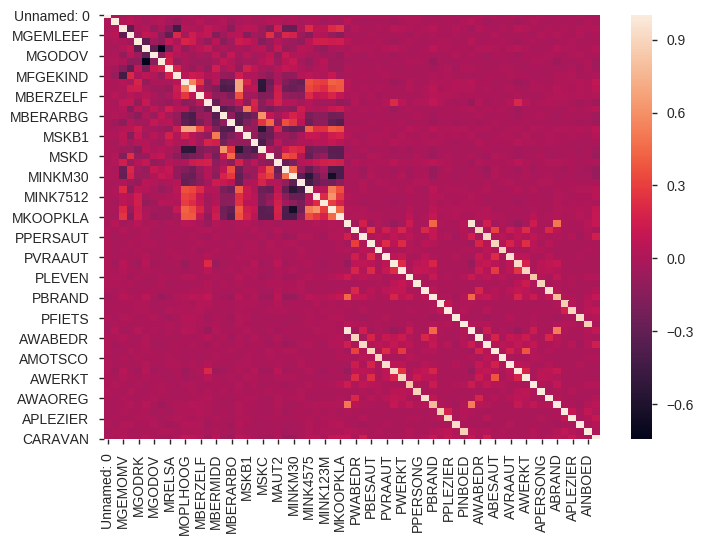

In [0]:
sns.heatmap(df.corr())

In [0]:
X1 = df.drop(["CARAVAN"],axis=1)
y1 = df["CARAVAN"]


#rough Model
#from sklean.linearmodel import LogisticRgrssion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knnclassifier = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X1, y1,
                                 test_size=0.3, random_state=42)


In [0]:
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)
knnclassifier.score(X_test, y_test)

0.9273039496279336

In [0]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9307384087006296

In [0]:
Buy = df[df['CARAVAN']==1]

NotBuy = df[df['CARAVAN']==0]

In [0]:
print(Buy.shape,NotBuy.shape)

(348, 64) (5474, 64)


In [0]:
X1.shape ,y1.shape

((5822, 63), (5822,))

In [0]:
#Handle-Imbalanced-Dataset

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X1,y1)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
X_res.shape,y_res.shape

((10874, 63), (10874,))

In [0]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y1)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 5474, 1: 348})
Resampled dataset shape Counter({0: 5437, 1: 5437})


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knnclassifier = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                 test_size=0.3, random_state=42)

In [0]:
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)
knnclassifier.score(X_test, y_test)

0.7821023597916028

In [0]:
from sklearn.model_selection import cross_val_score
knnclassifier = KNeighborsClassifier(n_neighbors=4)
#for i in range(1,10):
cross_val_score(knnclassifier, X_res,y_res, cv=20, scoring ='accuracy').mean()

0.49411764705882355

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import make_scorer

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3, random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred
#cross_val_score(logreg, X_res,y_res, cv=20, scoring=make_scorer(classification_report_with_accuracy_score))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [0]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

def classification_report_with_accuracy_score(x_test, y_pred):

    print(classification_report(x_test, y_pred)) # print classification report
    return accuracy_score(x_test, y_pred) # return accuracy score

In [0]:
cross_val_score(logreg, X_res,y_res, cv=20, scoring=make_scorer(classification_report_with_accuracy_score)).mean()


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

              precision    recall  f1-score   support

           0       0.58      0.61      0.59        18
           1       0.59      0.56      0.57        18

    accuracy                           0.58        36
   macro avg       0.58      0.58      0.58        36
weighted avg       0.58      0.58      0.58        36

              precision    recall  f1-score   support

           0       0.60      0.83      0.70        18
           1       0.73      0.44      0.55        18

    accuracy                           0.64        36
   macro avg       0.66      0.64      0.62        36
weighted avg       0.66      0.64      0.62        36

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        18
           1       0.71      0.67      0.69        18

    accuracy                           0.69        36
   macro avg       0.70      0.69      0.69        36
weighted avg       0.70      0.69      0.69        36

              preci

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.6683823529411763

In [0]:
    print(classification_report(y_test, y_pred)) # print classification report


              precision    recall  f1-score   support

           0       0.73      0.62      0.67       113
           1       0.62      0.73      0.67        96

    accuracy                           0.67       209
   macro avg       0.67      0.67      0.67       209
weighted avg       0.68      0.67      0.67       209



In [0]:
cm=confusion_matrix(y_test,y_pred)

(cm[0,0]+cm[1,1])/np.sum(cm)

0.6698564593301436

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report ,make_scorer


In [0]:
print(classification_report(y_test,y_pred))

In [0]:
# Save The Model

from sklearn.externals import joblib


joblib.dump(logreg,'model_joblib')



/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['model_joblib']

In [0]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7358259270609868

In [0]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.9638369598528961

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 



In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1657
           1       0.98      0.94      0.96      1606

    accuracy                           0.96      3263
   macro avg       0.96      0.96      0.96      3263
weighted avg       0.96      0.96      0.96      3263



In [0]:
cm=confusion_matrix(y_test,y_pred)

(cm[0,0]+cm[1,1])/np.sum(cm)

0.9638369598528961

In [0]:

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.9635406528475369

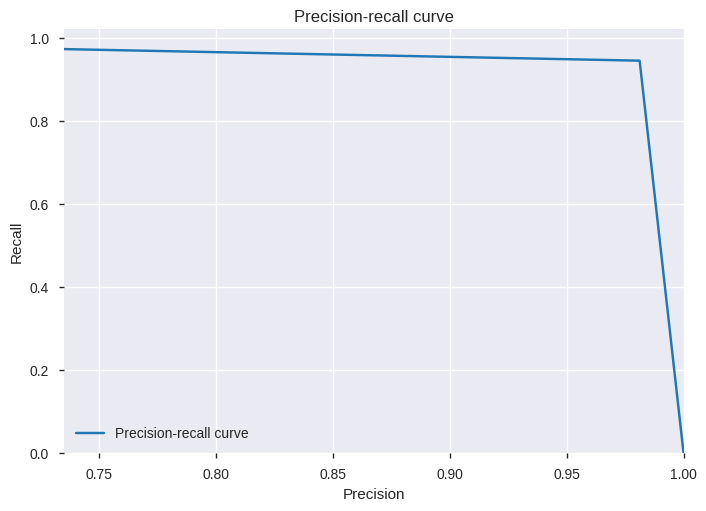

In [0]:

from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.xlim([0.735, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower left")

# save figure
plt.savefig('precision_recall.png', dpi=200)

In [0]:
X1.shape ,y1.shape

((5822, 63), (5822,))

In [0]:
#Imbalanced DataSet Handle by Under Sampling
from imblearn.under_sampling import NearMiss
nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_sample(X1,y1)

In [0]:
X_res.shape,y_res.shape

((696, 63), (696,))

In [0]:

from collections import Counter
print('Original dataset shape {}'.format(Counter(y1)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 5474, 1: 348})
Resampled dataset shape Counter({0: 348, 1: 348})


In [0]:
#from statsmodels.stats.outliers_influence import  variance_inflation_factor
#vif=pd.DataFrame()
#vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
#vif['vif']=x.columns
#res=[]
#temp=vif.copy()
#for i in range(86):
 # if(temp.iloc[i,0])<:
  #  res.append(temp.iloc[i,1])


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knnclassifier = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                 test_size=0.3, random_state=42)

In [0]:
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)
knnclassifier.score(X_test, y_test)

0.5933014354066986

In [0]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6698564593301436

In [0]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.7033492822966507